## Silence Detection

In this notebook we iterate over all the files in the face 2 face data and calculate the mean DBFS value for each chunk (1 second long). 

If we come across completely silent parts these are imputed to the value -96 DBFS which is the theoretical minimum noise floor for 16 bit audio.

Then all videos in which the mean DBFS level is lower than -90 dbfs are classified as silent, all sound levels are plotted to verify the results.  

Lastly a silence flag is saved to the csv file with participant response data. 

The corresponding analysis was performed on the Zoom data, in which no silent files were found. 

In [10]:
from glob import glob
import os
import numpy as np
import pandas as pd

from audio_analysis import plot_sound_levels_overview, analyze_audio, plot_sound_levels

In [2]:
F2F_paths = "data/Face-to-Face/**/*.mp4"

In [3]:
globs = glob(F2F_paths)

dbfs_data = {}  # This will store tuples of (dbfs_values, is_silent)

for path in globs:
    # audio_file = 'data/Face-to-Face/F1A/F1A.mp4'
    dbfs_values = analyze_audio(path)

    print(f'{os.path.basename(path)} mean: {np.mean(dbfs_values)}')
    print(f'{os.path.basename(path)} std: {np.std(dbfs_values)}')

    file_mean = np.mean(dbfs_values)
    is_silent = file_mean < -90
    if is_silent:
        print(f'file {os.path.basename(path)} is silent')

    dbfs_data[path] = (dbfs_values, is_silent)

bit_depth: 16
F9B.mp4 mean: -41.43287326002675
F9B.mp4 std: 1.0590571272365428
bit_depth: 16
F5A.mp4 mean: -42.01305615253035
F5A.mp4 std: 3.698331640872362
bit_depth: 16
F7B.mp4 mean: -42.513245411328874
F7B.mp4 std: 5.150889199259617
bit_depth: 16
F14B.mp4 mean: -41.33737099812267
F14B.mp4 std: 0.5779152857221918
bit_depth: 16
F15A.mp4 mean: -96.0
F15A.mp4 std: 0.0
file F15A.mp4 is silent
bit_depth: 16
F2B.mp4 mean: -54.30817205597523
F2B.mp4 std: 2.797875625904198
bit_depth: 16
F8B.mp4 mean: -41.96899610774135
F8B.mp4 std: 0.17159190209367056
bit_depth: 16
F7A.mp4 mean: -42.513188896078596
F7A.mp4 std: 5.1508114218372665
bit_depth: 16
F16B.mp4 mean: -96.0
F16B.mp4 std: 0.0
file F16B.mp4 is silent
bit_depth: 16
F19B.mp4 mean: -96.0
F19B.mp4 std: 0.0
file F19B.mp4 is silent
bit_depth: 16
F3A.mp4 mean: -96.0
F3A.mp4 std: 0.0
file F3A.mp4 is silent
bit_depth: 16
F10B.mp4 mean: -41.986808774411045
F10B.mp4 std: 0.13666844357990596
bit_depth: 16
F18B.mp4 mean: -46.76979420996543
F18B.mp4 

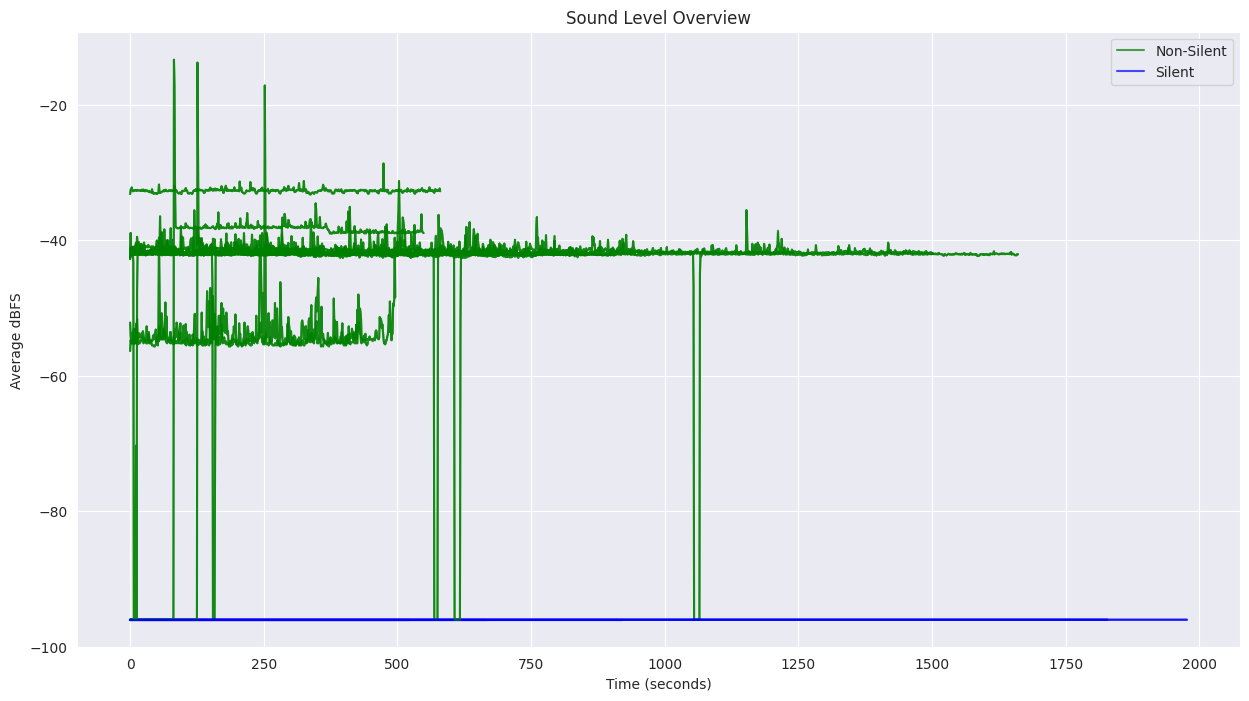

In [4]:
plot_sound_levels_overview(dbfs_data)

In [5]:
f2f_path = "data/out/f2f.csv"
df = pd.read_csv(f2f_path)
df.head()

,id,dyad...4,consent,age,education,gender,1. jag är bra på att beskriva mina känslor,"2. när jag mår bra, kan jag lätt säga om det beror på att jag är stolt över mig själv, glad eller avslappnad.",3. jag har svårt att förstå varför jag reagerar på det sätt jag gör.,4. när jag känner mig nedstämd kan jag enkelt göra en koppling mellan mina känslor och den situation som påverkade mig.,...,la förhandlingen en bra grund för eventuella framtida samarbeten eller en social relation med din motpart?,var det viktigt för dig att vinna spelet?,tycker du att din medspelare var trevlig?,var det viktigt för dig att din motpart skulle vara nöjd med utfallet av förhandlingen?,poäng,resultat,...54,dyad...55,totalpoäng,"bekanta (1=ja, 0=nej)"
0,F9B,9,Ja,33,Masterexamen,Man,6,4,1,7,...,7,4,7,7,1000,Lika,NaN,6.0,1800.0,1.0
1,F5A,5,Ja,34,Gymnasium,Man,6,5,3,3,...,5,3,7,5,675,Vinst,NaN,14.0,1570.0,1.0
2,F7B,7,Ja,24,Gymnasium,Man,5,6,2,5,...,6,5,7,2,700,Förlust,NaN,18.0,1200.0,1.0
3,F14B,14,Ja,21,Gymnasium,Kvinna,6,5,6,6,...,5,7,5,7,880,Vinst,NaN,NaN,NaN,NaN
4,F15A,15,Ja,23,Kandidatexamen,Man,3,6,2,6,...,5,5,6,2,945,Vinst,NaN,NaN,NaN,NaN


In [6]:
silent_files = []

for key, val in dbfs_data.items():
    data, is_silent = val
    if is_silent:
        silent_files.append(os.path.basename(key))
        
# Convert 'id' column to match file names and check for silence
df['is_silent'] = df['id'].apply(lambda x: f'{x}.mp4' in silent_files)
df.head()

,id,dyad...4,consent,age,education,gender,1. jag är bra på att beskriva mina känslor,"2. när jag mår bra, kan jag lätt säga om det beror på att jag är stolt över mig själv, glad eller avslappnad.",3. jag har svårt att förstå varför jag reagerar på det sätt jag gör.,4. när jag känner mig nedstämd kan jag enkelt göra en koppling mellan mina känslor och den situation som påverkade mig.,...,var det viktigt för dig att vinna spelet?,tycker du att din medspelare var trevlig?,var det viktigt för dig att din motpart skulle vara nöjd med utfallet av förhandlingen?,poäng,resultat,...54,dyad...55,totalpoäng,"bekanta (1=ja, 0=nej)",is_silent
0,F9B,9,Ja,33,Masterexamen,Man,6,4,1,7,...,4,7,7,1000,Lika,NaN,6.0,1800.0,1.0,False
1,F5A,5,Ja,34,Gymnasium,Man,6,5,3,3,...,3,7,5,675,Vinst,NaN,14.0,1570.0,1.0,False
2,F7B,7,Ja,24,Gymnasium,Man,5,6,2,5,...,5,7,2,700,Förlust,NaN,18.0,1200.0,1.0,False
3,F14B,14,Ja,21,Gymnasium,Kvinna,6,5,6,6,...,7,5,7,880,Vinst,NaN,NaN,NaN,NaN,False
4,F15A,15,Ja,23,Kandidatexamen,Man,3,6,2,6,...,5,6,2,945,Vinst,NaN,NaN,NaN,NaN,True


In [7]:
print(f'There are {len(silent_files)} silent files out of {len(dbfs_data)}')

There are 10 silent files out of 40


In [8]:
df.to_csv(f2f_path, index=False)

In [ ]:
for key, val in dbfs_data.items():
    data, is_silent = val
    if not is_silent:
        

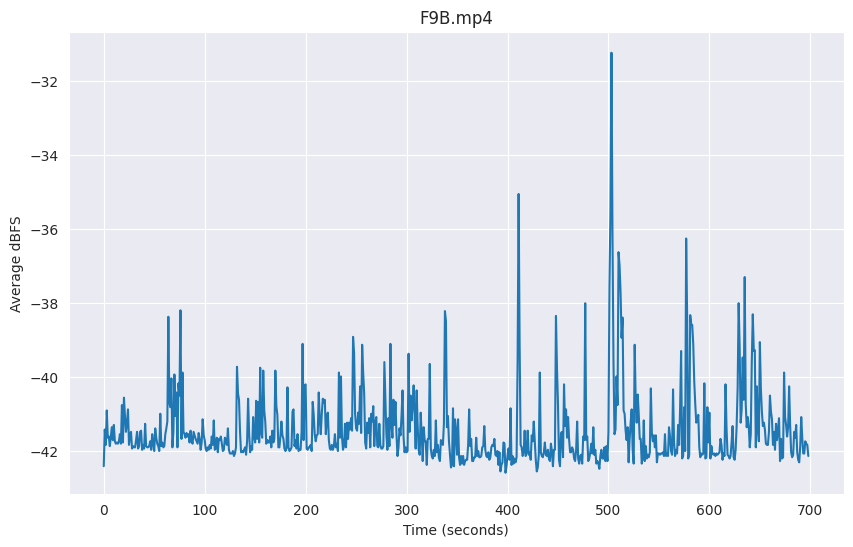

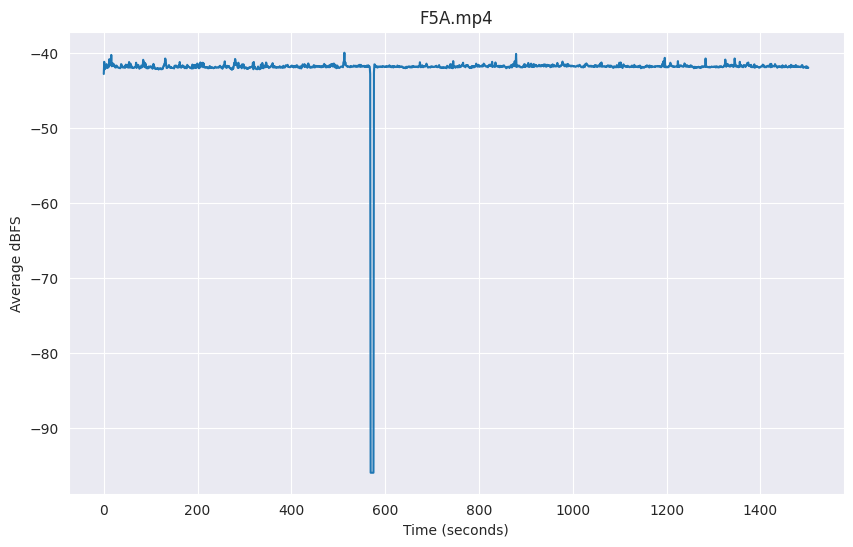

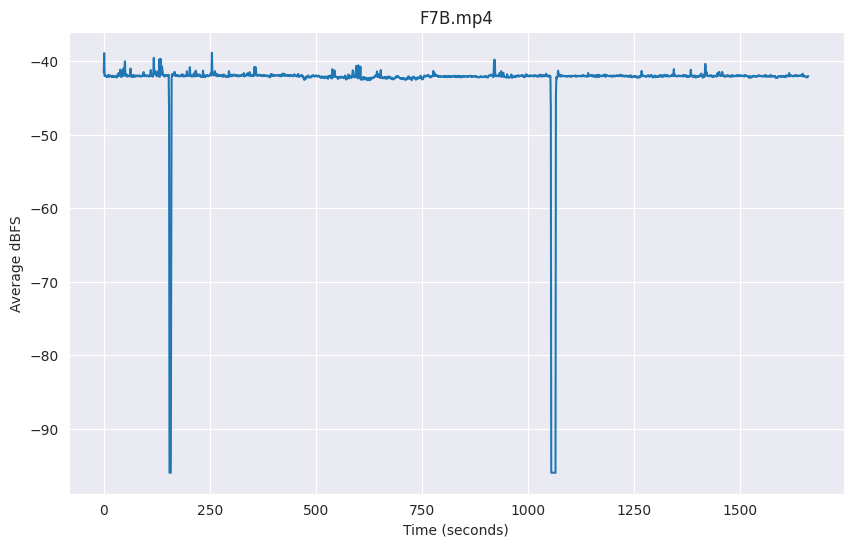

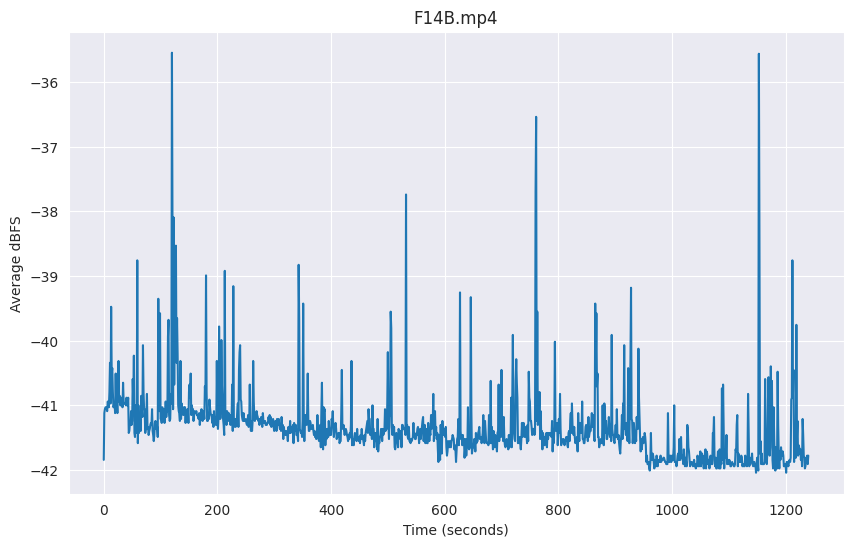

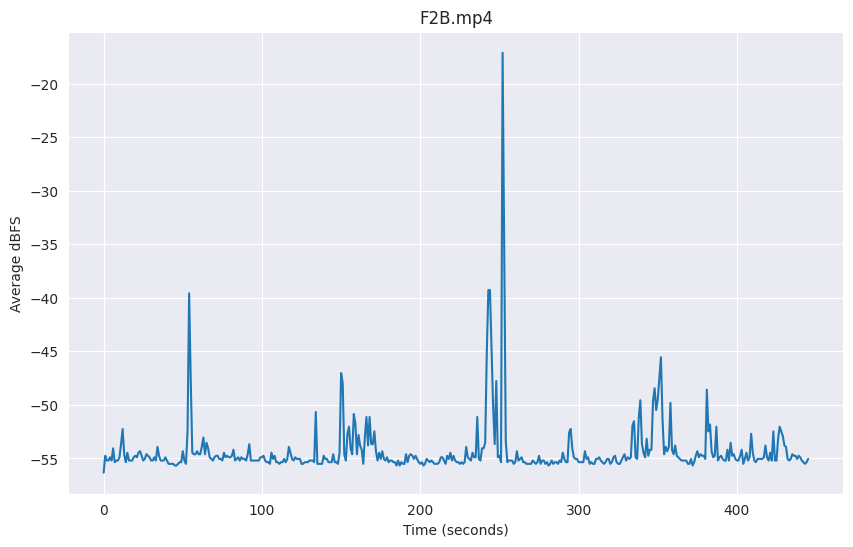

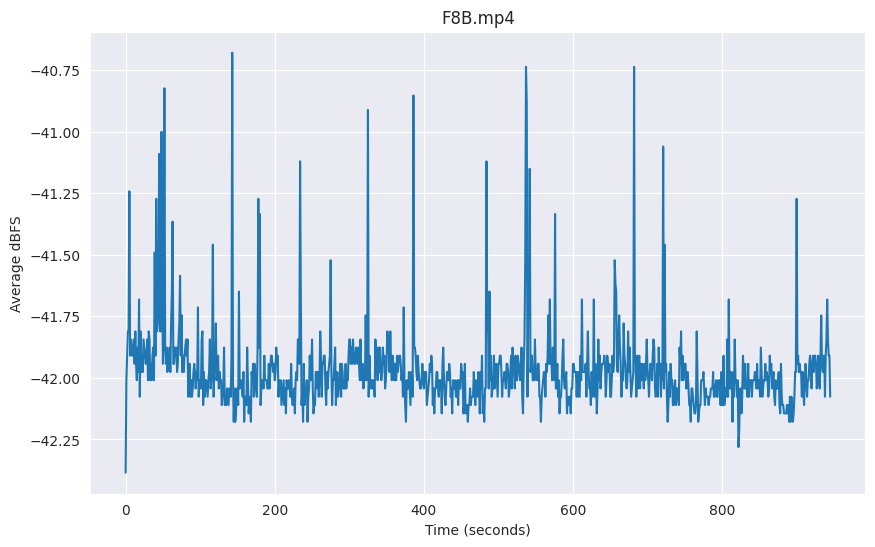

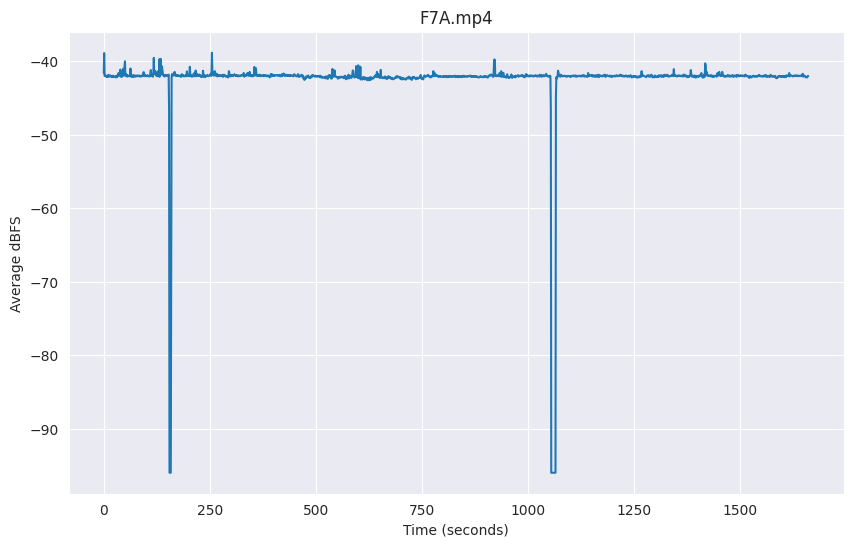

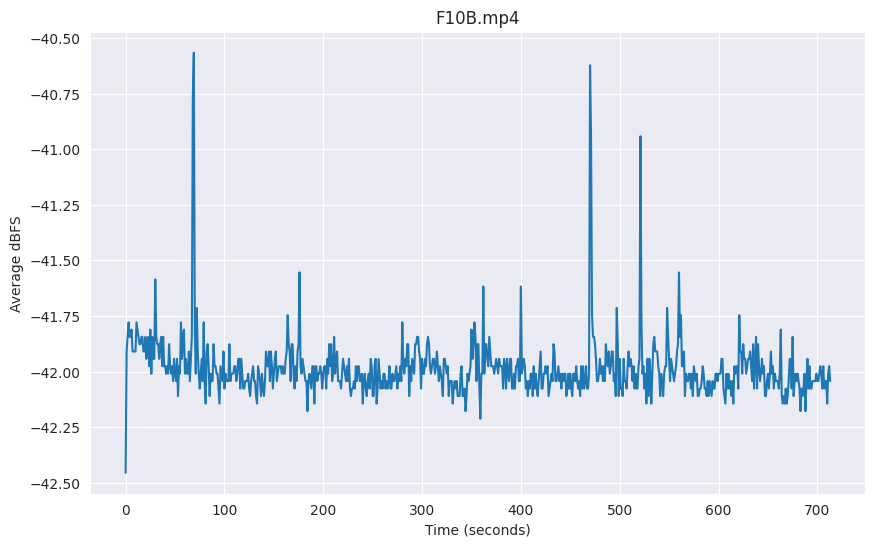

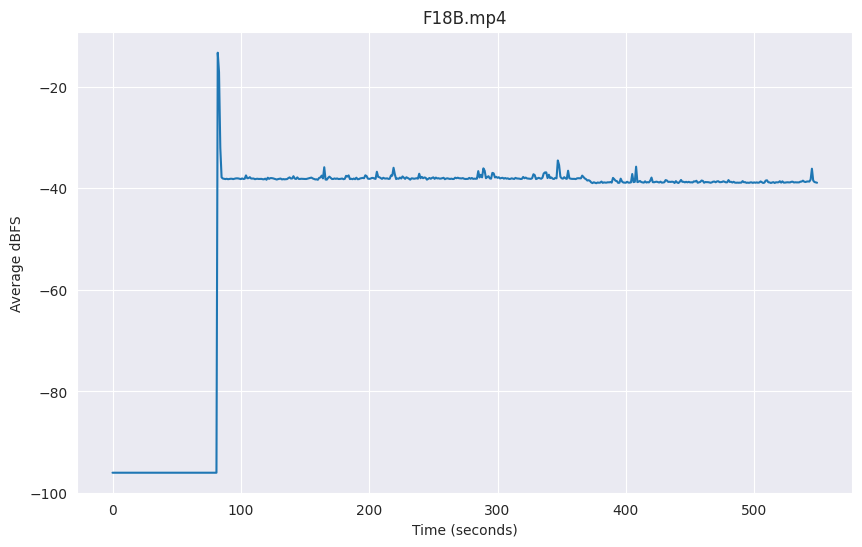

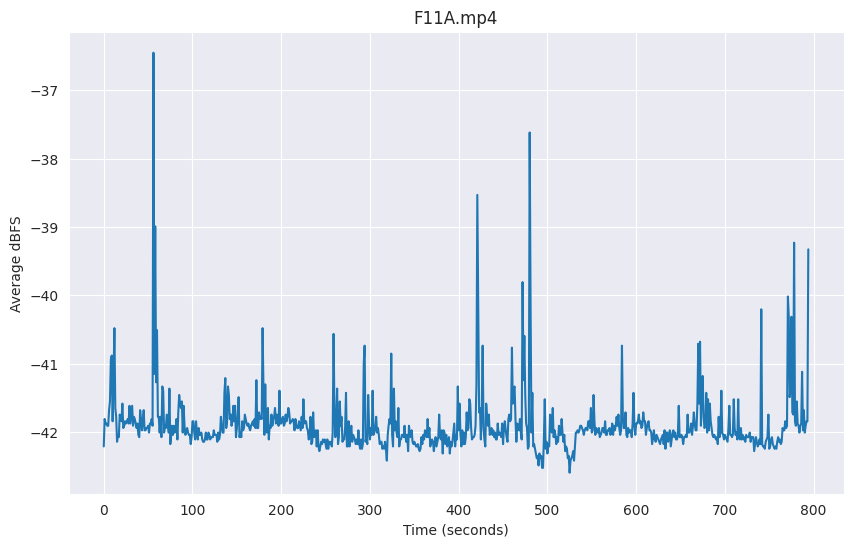

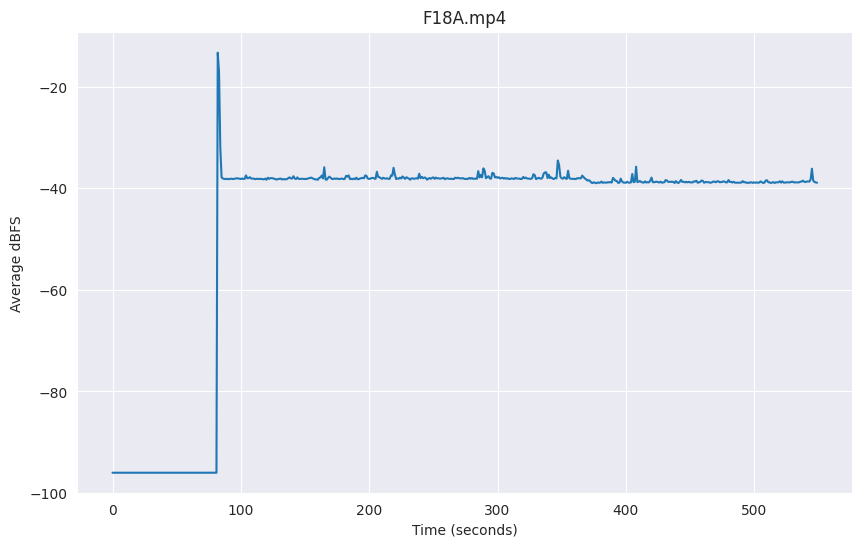

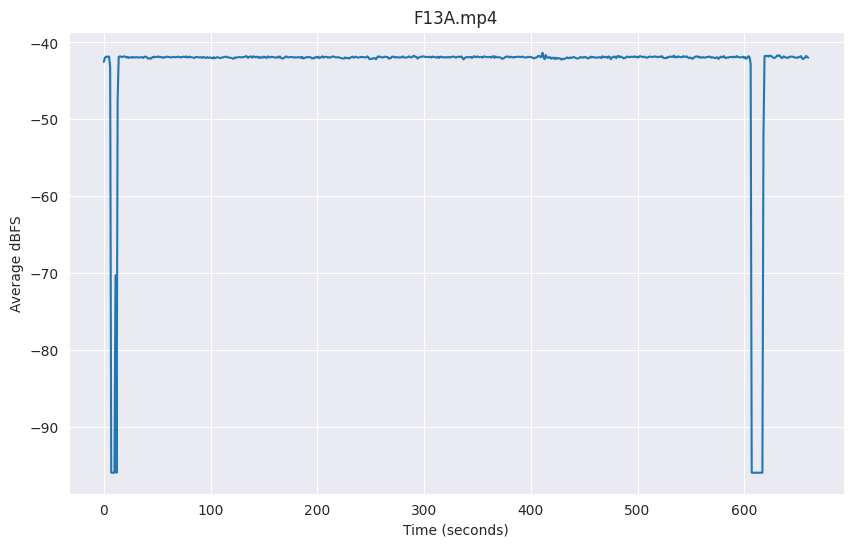

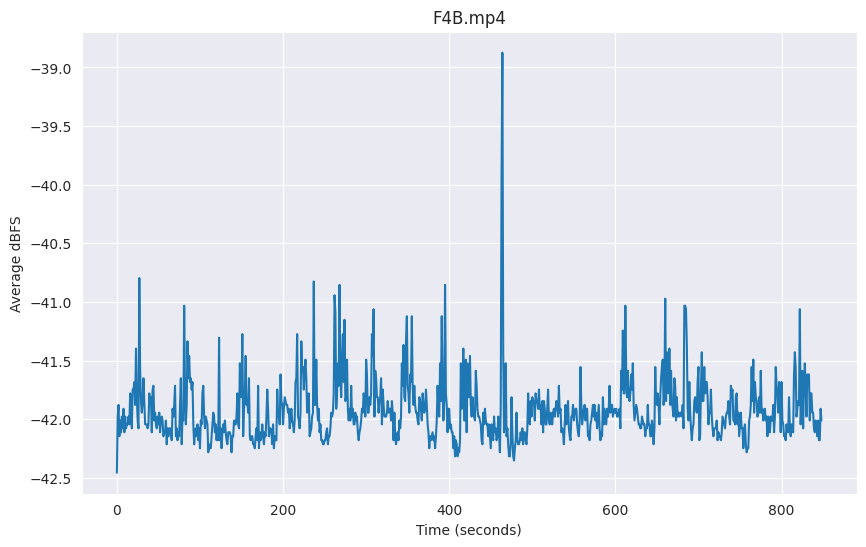

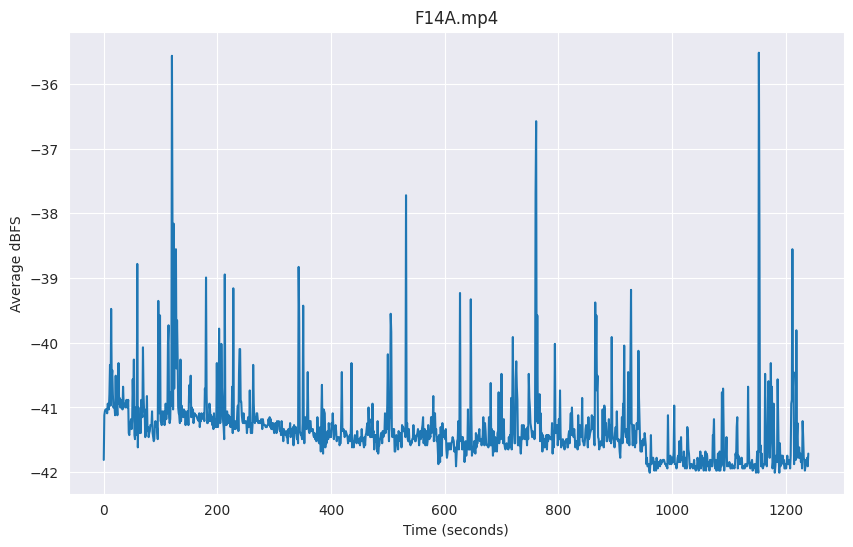

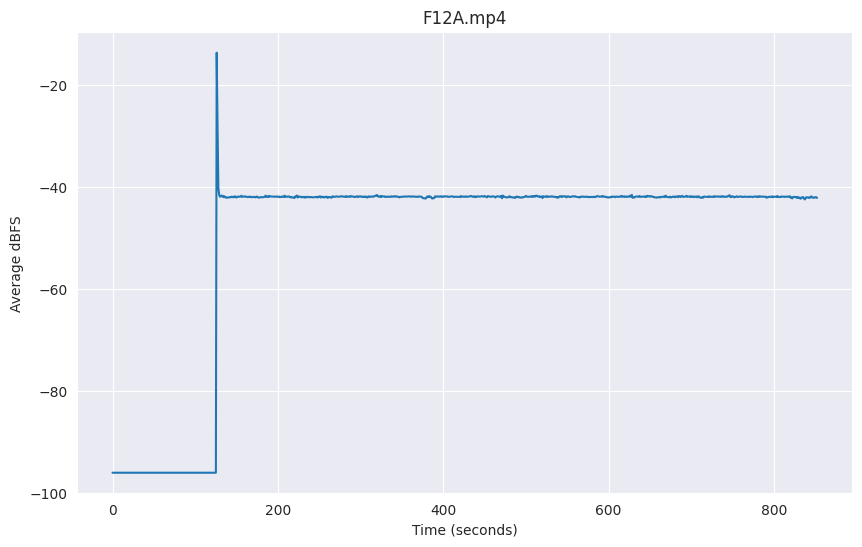

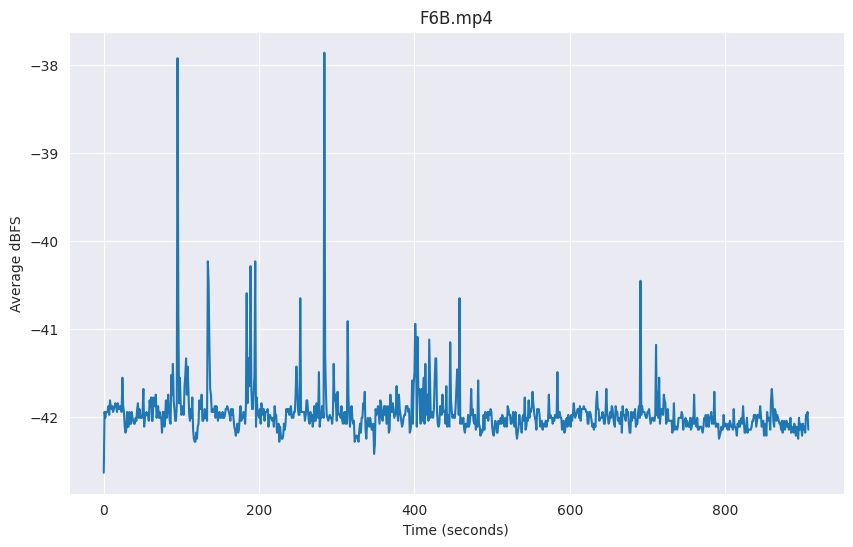

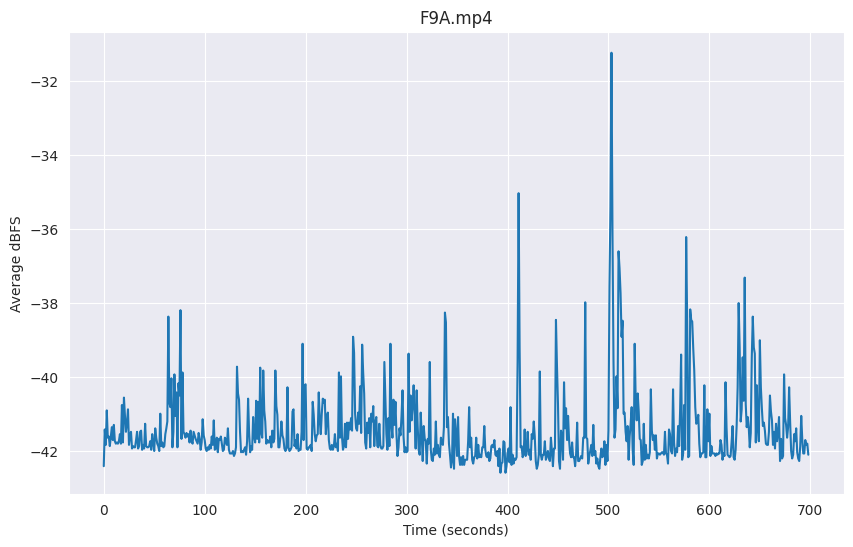

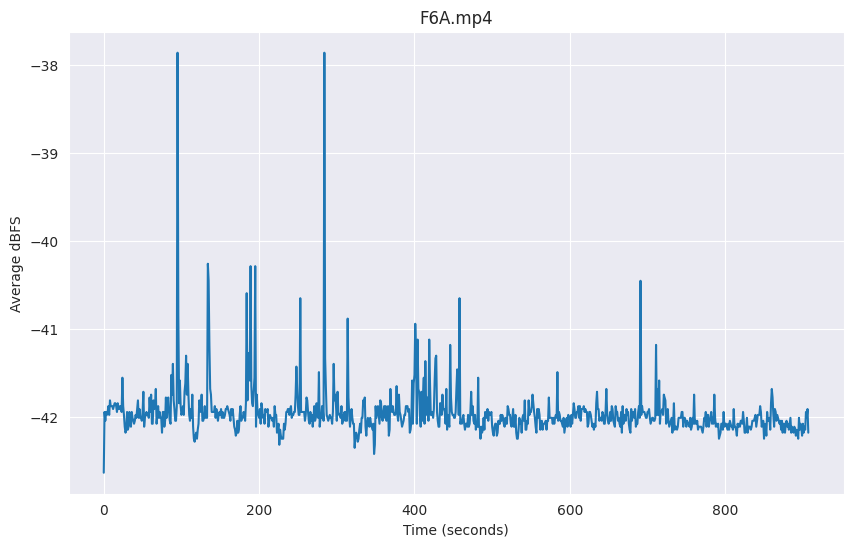

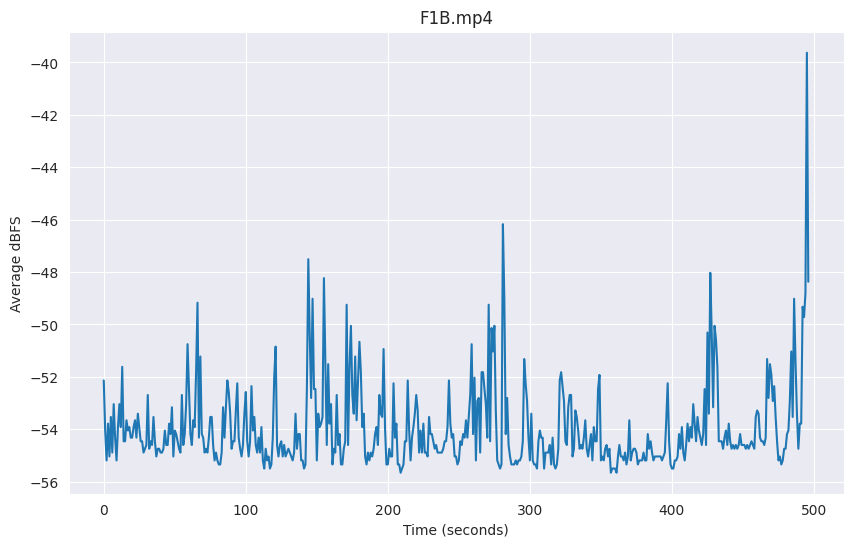

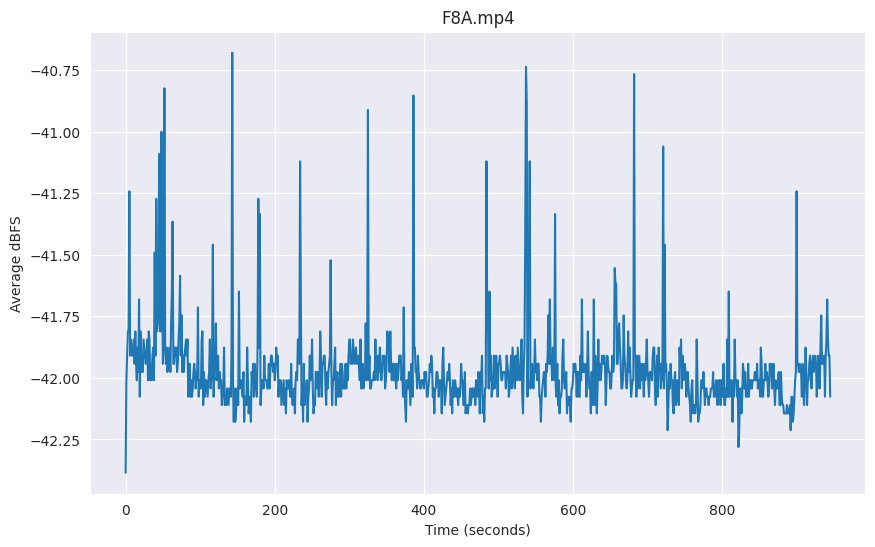

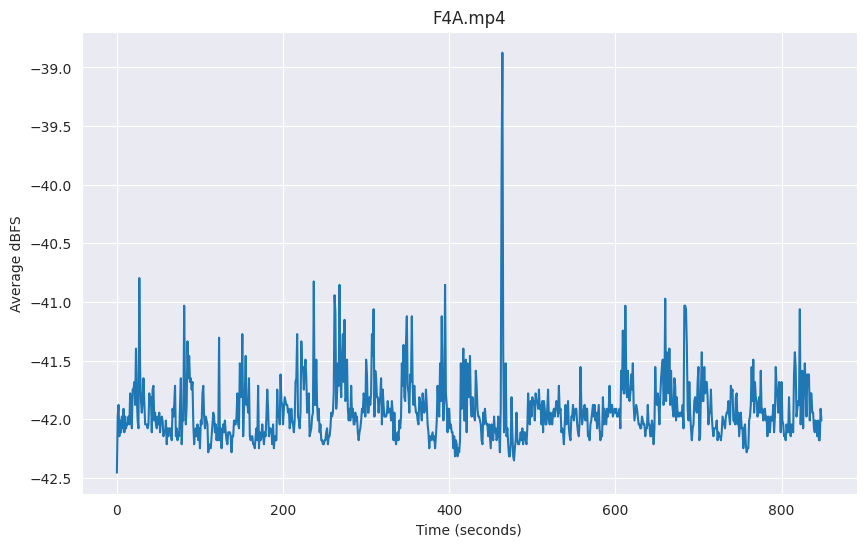

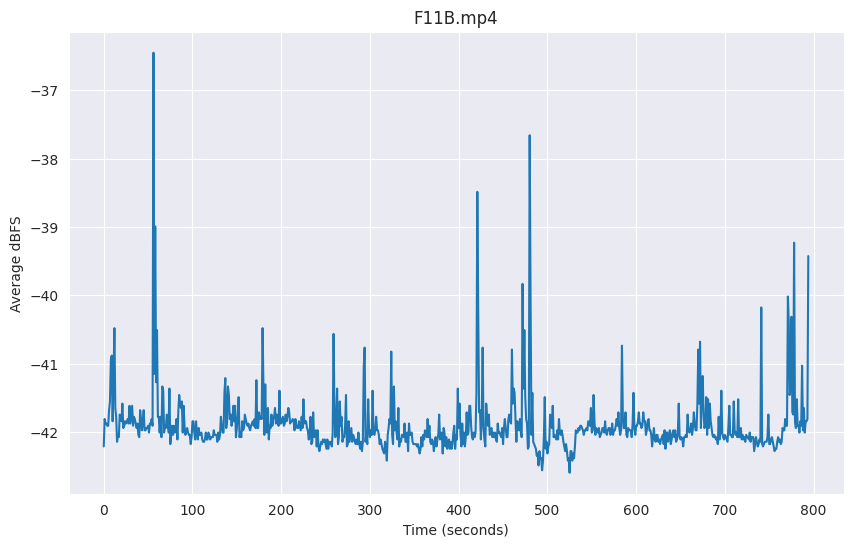

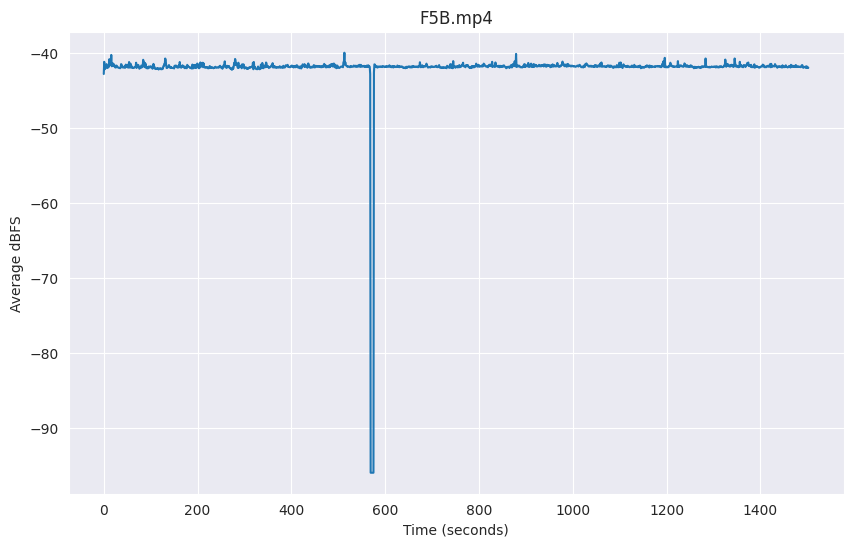

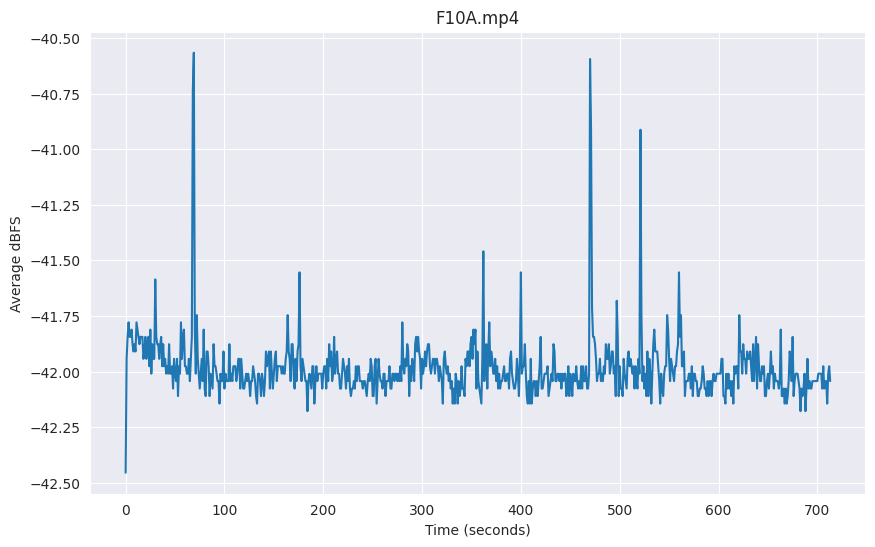

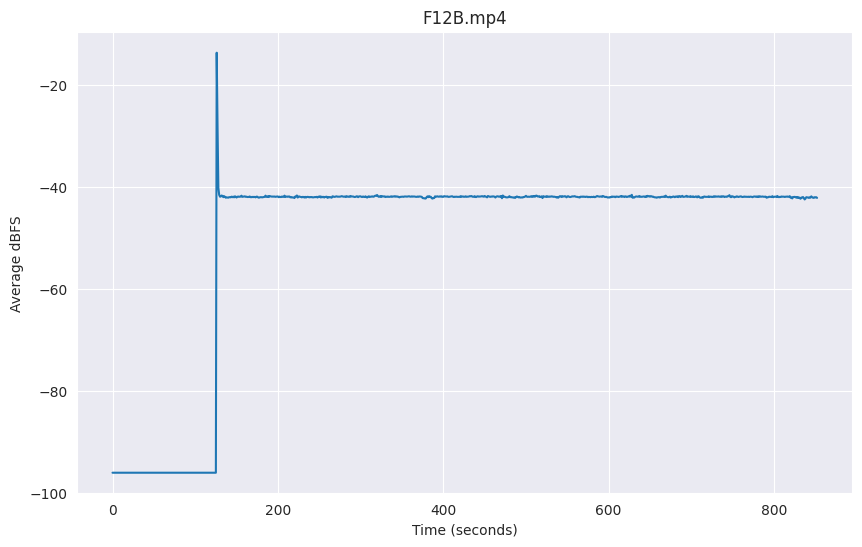

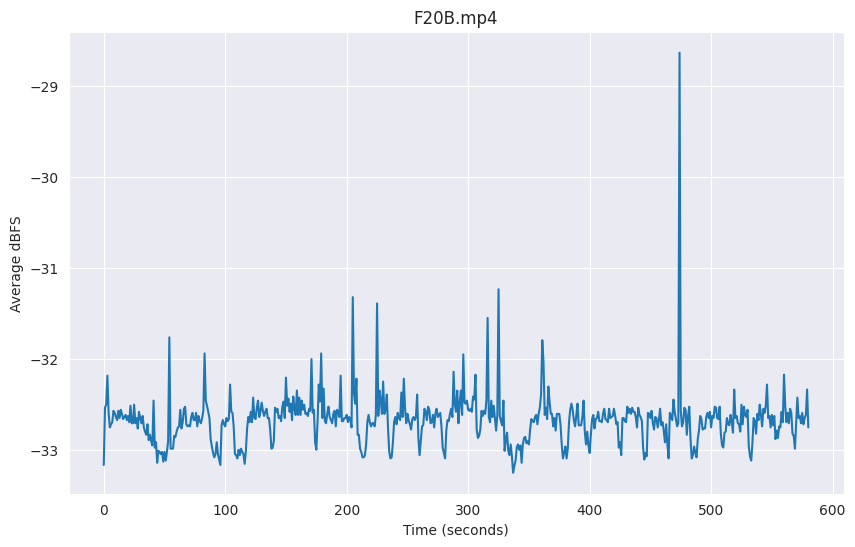

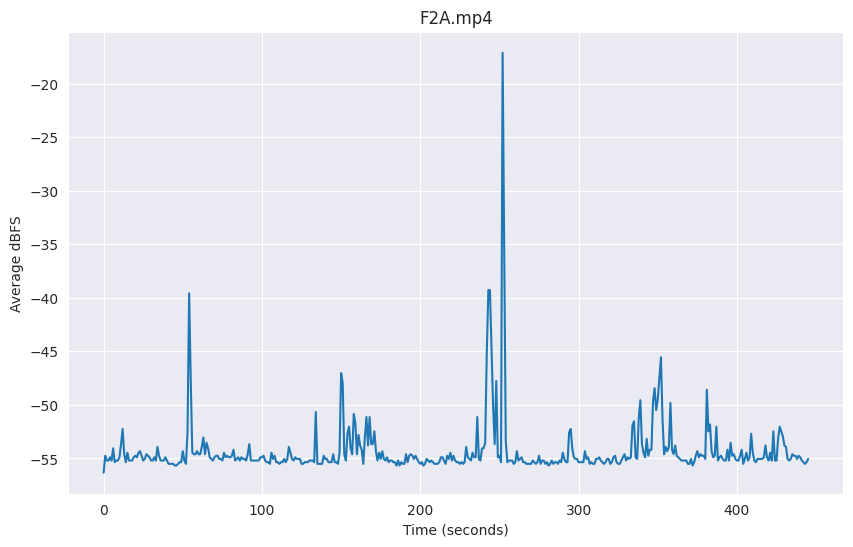

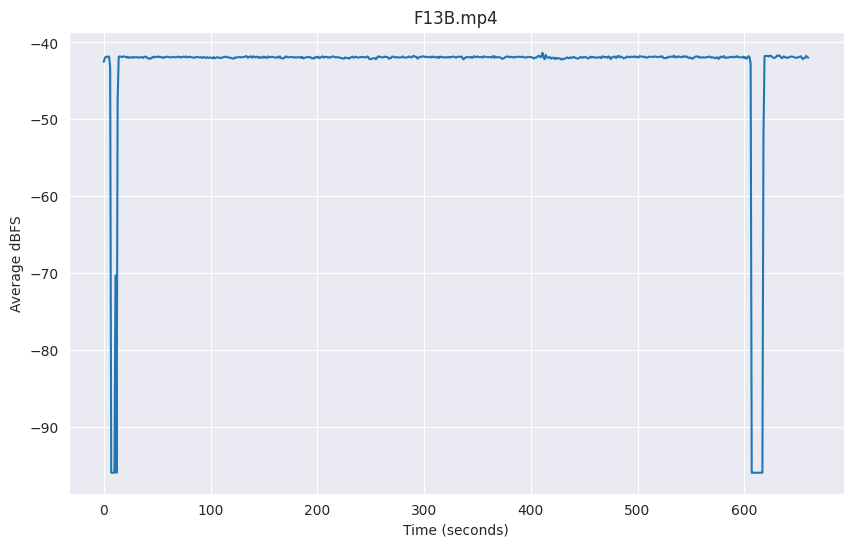

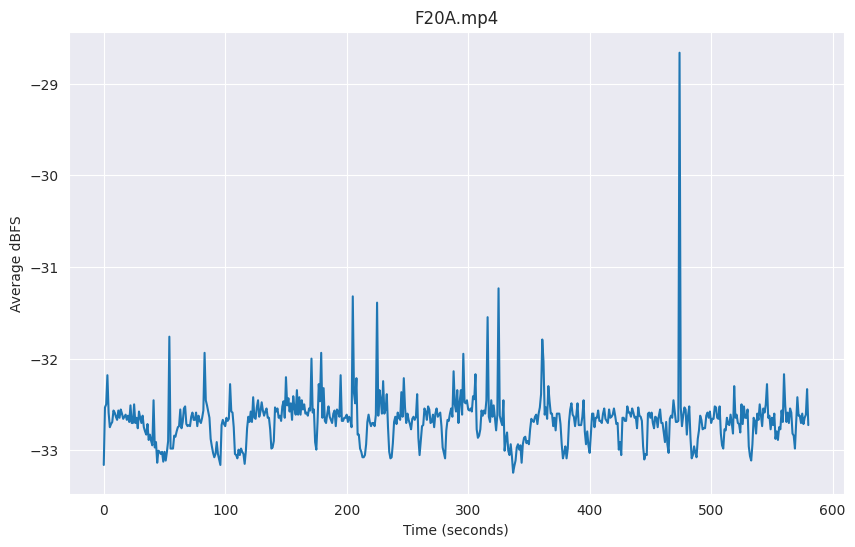

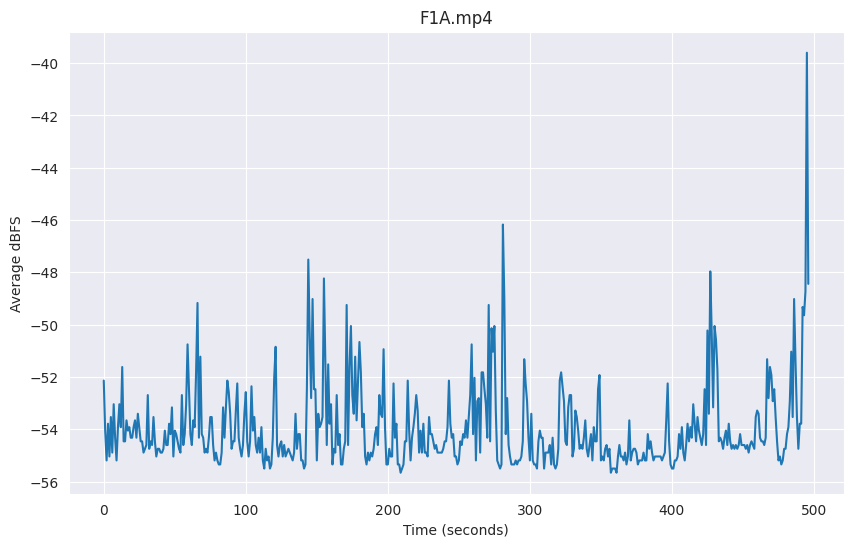

In [11]:
for key, val in dbfs_data.items():
    data, is_silent = val
    if not is_silent:
        plot_sound_levels(data, f'{os.path.basename(key)}')